# Examining Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bmi.csv")

In [5]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [59]:
#importing sklearn for applying machine learning
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [60]:
# Manipulating data to get a simplified version

# changing from Male, Female to 0, 1
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [61]:
#visualizing change
data.head()

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,underweight
2,0,185,110,overweight
3,0,195,104,normal
4,1,149,61,normal


In [ ]:
# Categorizing data

cat = (0,1,2,3,4,5)
health = ['malnourished','underweight','normal','overweight','obese']
data['Index'] = pd.cut(data['Index'], bins = cat, labels = health)

TypeError: '<' not supported between instances of 'int' and 'str'

In [63]:
# checking category division
data['Index'].value_counts()

Index
obese           198
overweight      130
underweight      69
normal           68
malnourished     22
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Index'>

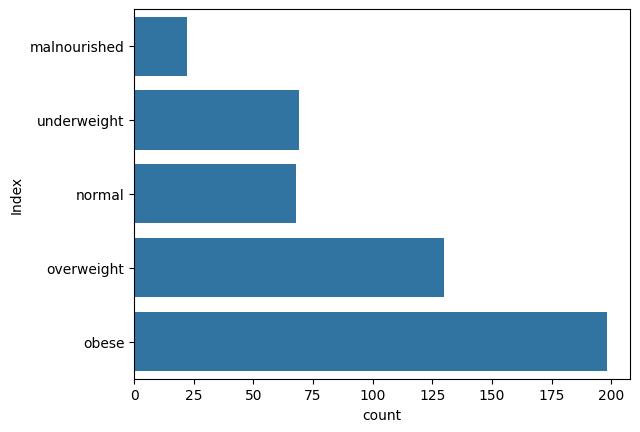

In [64]:
# Checking data after categorizing

#sns.countplot(data['Gender'])
sns.countplot(data['Index'])

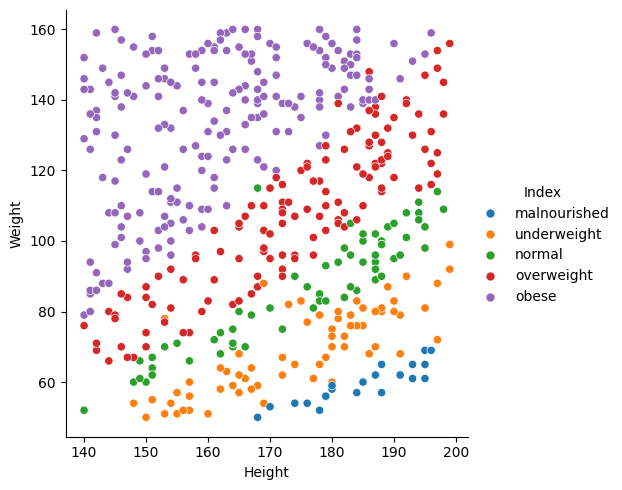

In [65]:
# Examining relations

sns.relplot(x="Height",y="Weight",hue="Index",data=data)

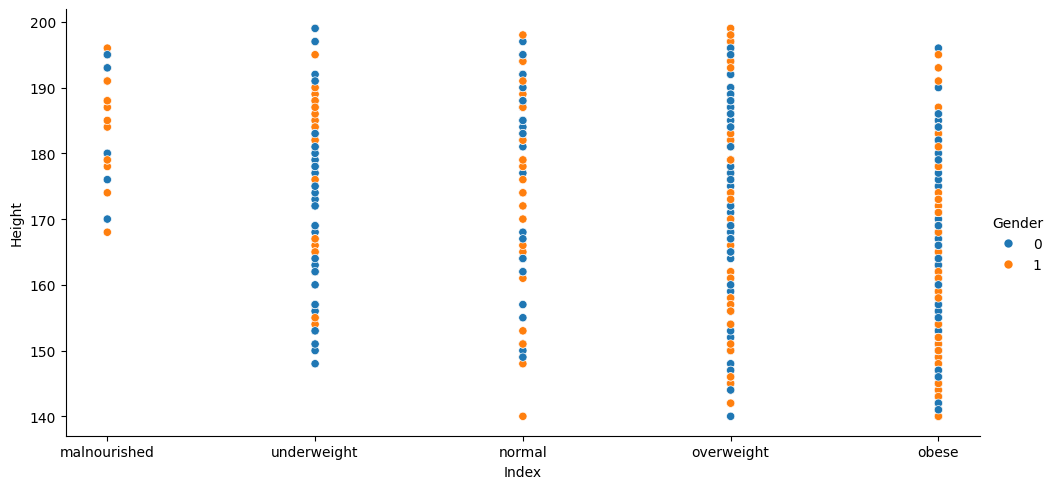

In [66]:
# Random checks
sns.relplot(x="Index",y="Height",data=data, hue="Gender", aspect=2)

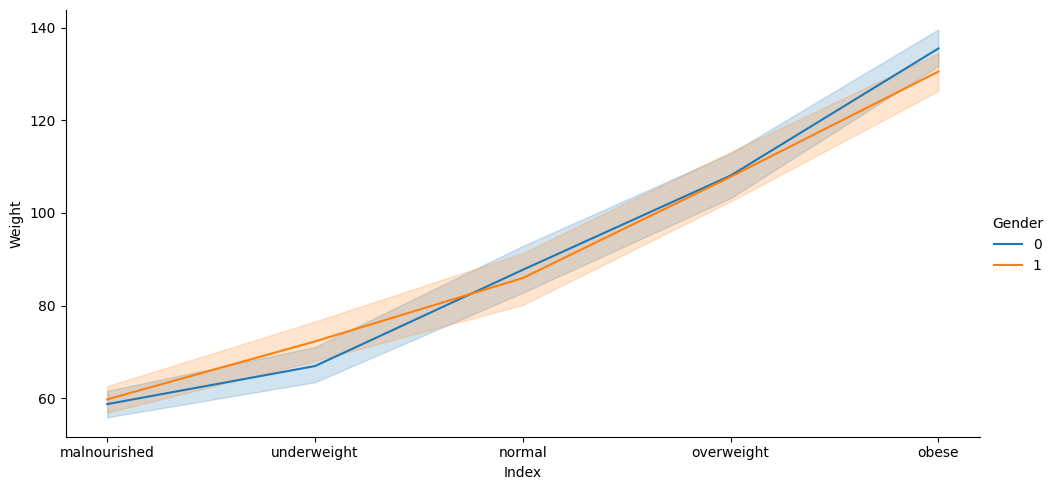

In [67]:
# Random checks
sns.relplot(x="Index",y="Weight",kind='line',data=data, hue="Gender", aspect=2)

# Creating a Prediction Model

In [72]:
# Just fixing stuff

X = data.drop('Index',axis=1)
y = data['Index']

In [73]:
# using Support Vector Machine to map data to a high dimension mapping space to eventually categorize them

# using split function to prepare this data, it shuffles and the splits based on parameters
# train_size = 0.2 means 20% goes to training, 70% goes to testing
# random state tells the function to shuffle the data identically every time in order to make our results replicable
# random state = 0 means the results will change every time, most likely
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [70]:
'''
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
The fit method is calculating the mean and variance of each of the features present in our data.
The transform method is transforming all the features using the respective mean and variance
'''

'''
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
Thus, the parameters learned by our model using the training data will help us to transform our test data.
'''

'''
WHY IS fit_transform() USED IN TRAINING & transform() IN TESTING
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature 
and will let our model learn about our test data too. 
Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing 
on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.
'''


s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [78]:
y_train

180          normal
356      overweight
131     underweight
462    malnourished
498           obese
           ...     
323           obese
192      overweight
117           obese
47       overweight
172           obese
Name: Index, Length: 100, dtype: category
Categories (5, object): ['malnourished' < 'underweight' < 'normal' < 'overweight' < 'obese']

In [74]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

ValueError: Input contains NaN

In [77]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

NameError: name 'pred' is not defined